In [2]:
#This project is about the "bike rental data" datasets 
#project motive is Predicting Bike Rental Demand 
#Will find out affeting bike rental on various factors 
#Part(A): EDA 
#1.Preporssing steps
#2.Identifying Missing Values
#3.Summary statistics
#4.Visualization of relation of various factor on regarding bike rental
#5.Correlation Analysis
#6.Finding outliers and its Visualizations

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
bike=pd.read_csv("bike.csv")

In [14]:
bike

,instant,rent_date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,number_of_bike_rental
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [13]:

bike.head()

,instant,rent_date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,number_of_bike_rental
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   rent_date              17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   year                   17379 non-null  int64  
 4   month                  17379 non-null  int64  
 5   hour                   17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [10]:
bike.shape

(17379, 17)

In [9]:
bike.isnull().sum()

instant                  0
rent_date                0
season                   0
year                     0
month                    0
hour                     0
holiday                  0
weekday                  0
workingday               0
weathersit               0
temp                     0
atemp                    0
hum                      0
windspeed                0
casual                   0
registered               0
number_of_bike_rental    0
dtype: int64

In [32]:
bike.describe()

,instant,rent_date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,number_of_bike_rental,z_score
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,1.737900e+04
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,-6.051000e-17
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.039008e+00
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,-8.239984e-01
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,-2.616667e-01
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,5.046481e-01
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,4.341735e+00
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,1.000000e+00


In [15]:
bike['rent_date'] = pd.to_datetime(bike['rent_date']) # converting in to datetime formate

In [ ]:
#find belo are the EDA plots to know more visualization and insights of the dataset " Bike"
#1._lineplot:Trend analysis over seasons
#2._Lineplot:Trend analysis over months
#3._Line plot:Total bike rentals over Date
#4._Barplot: trend on bike rental based opn weather sitiation
#5._Boxplot:Number of bike rental over month by boxplot
#6._Scatterplot:Temperature effect on Bike rental
#7._#Correlation heatmap on bike rental

<Axes: xlabel='season', ylabel='number_of_bike_rental'>

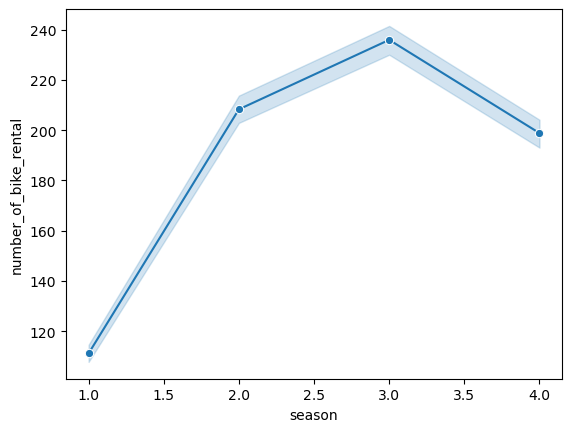

In [16]:
#1._trend analysis over seasons

sns.lineplot(data=bike,x="season",y="number_of_bike_rental",marker="o")

<Axes: xlabel='month', ylabel='number_of_bike_rental'>

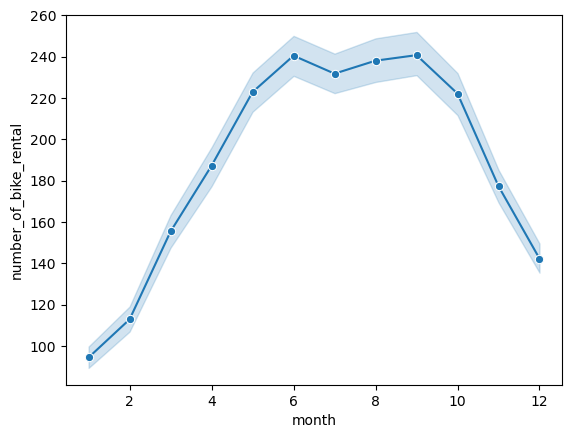

In [17]:
#trend analysis over months

sns.lineplot(data=bike,x="month",y="number_of_bike_rental",marker="o")

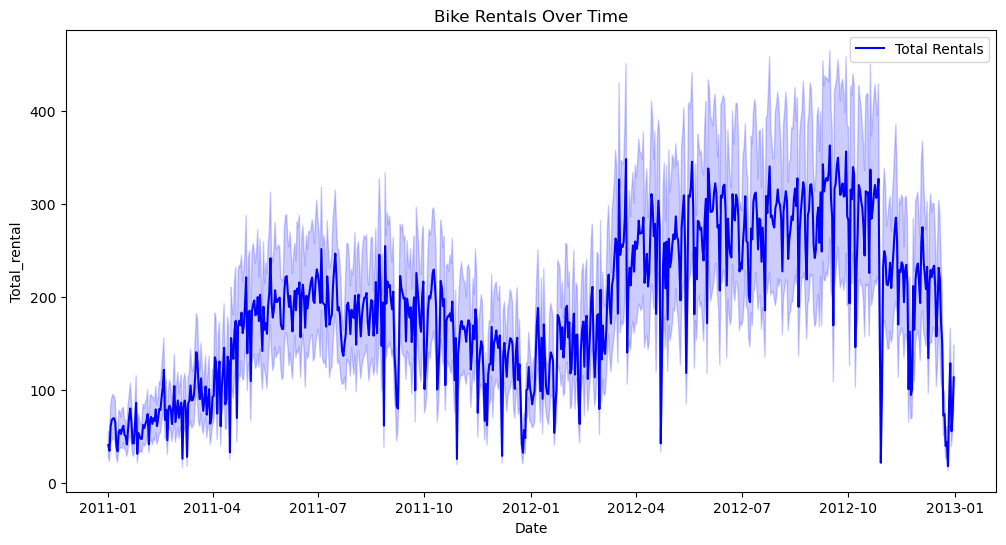

In [18]:
# Line plot for total bike rentals over Date
plt.figure(figsize=(12, 6))
sns.lineplot(data=bike, x='rent_date', y='number_of_bike_rental', label='Total Rentals', color='blue')
plt.title('Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total_rental')
plt.show()

<Axes: xlabel='weathersit', ylabel='number_of_bike_rental'>

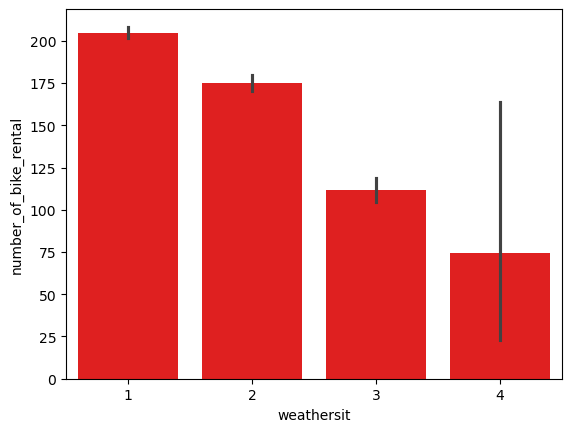

In [9]:
#trend on bike rental based opn weather sitiation

sns.barplot(data=bike,x="weathersit",y="number_of_bike_rental",color="r")

<Axes: xlabel='month', ylabel='number_of_bike_rental'>

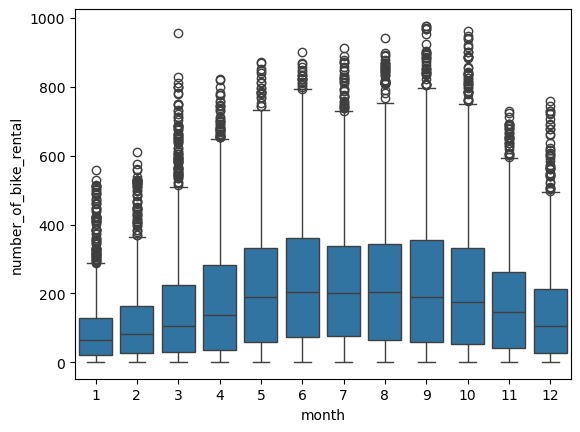

In [29]:
#number of bike rental over month by boxplot

sns.boxplot(data=bike,x="month",y="number_of_bike_rental")

In [ ]:
show me a capston project on below dataset

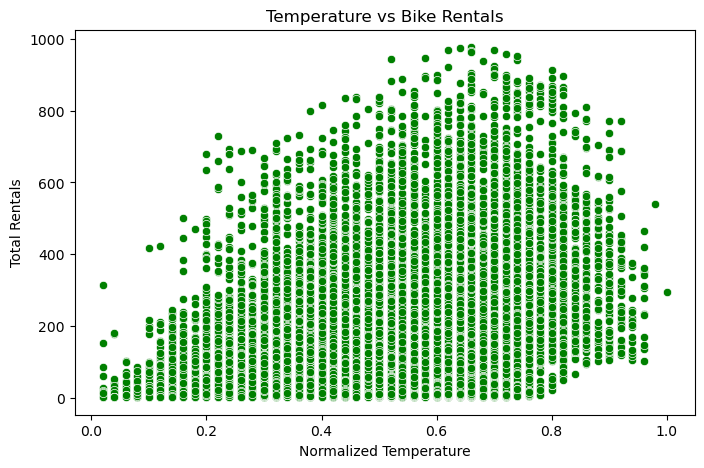

In [20]:
#Temperature effect on Bike rental
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='number_of_bike_rental', data=bike, color='green')
plt.title('Temperature vs Bike Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.show()

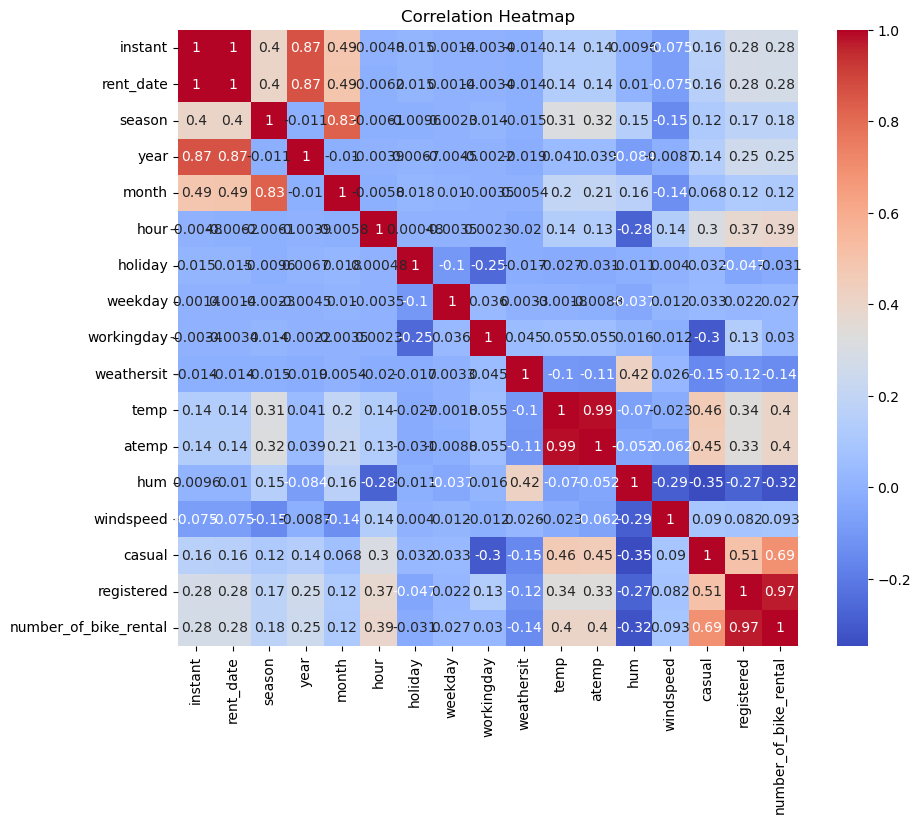

In [23]:
#Correlation heatmap on bike rental
plt.figure(figsize=(10, 8))
corr_matrix = bike.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#finding out the Outliers
#Here we are using two method to find out outliers
#1._IQR Method
#2._Z-Score Method

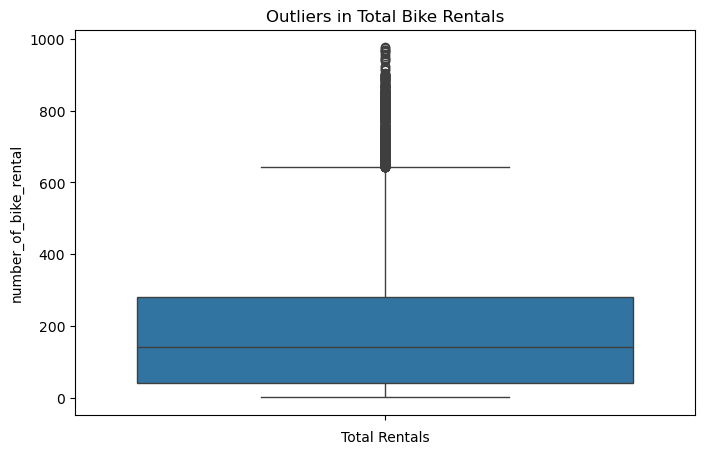

In [24]:
#Detecting Outliers in Total Rentals

plt.figure(figsize=(8, 5))
sns.boxplot(bike['number_of_bike_rental'])
plt.title('Outliers in Total Bike Rentals')
plt.xlabel('Total Rentals')
plt.show()

In [28]:
#.1_ IQR Method for Outlier Detection
Q1 = bike['number_of_bike_rental'].quantile(0.25)
Q3 = bike['number_of_bike_rental'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bike[(bike['number_of_bike_rental'] < lower_bound) | (bike['number_of_bike_rental'] > upper_bound)]

print(f'Number of outliers detected: {len(outliers)}')
print(outliers[['rent_date', 'number_of_bike_rental']])

Number of outliers detected: 505
       rent_date  number_of_bike_rental
5536  2011-08-23                    651
10358 2012-03-12                    644
10359 2012-03-12                    712
10382 2012-03-13                    676
10383 2012-03-13                    734
...          ...                    ...
16885 2012-12-11                    724
16909 2012-12-12                    688
16933 2012-12-13                    679
17053 2012-12-18                    662
17077 2012-12-19                    678

[505 rows x 2 columns]


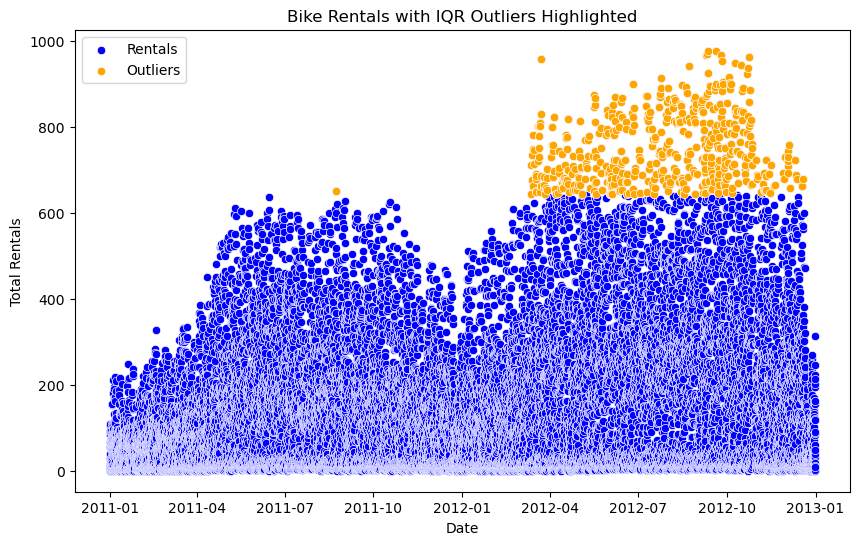

In [31]:
# Visualization of IQR Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike, x='rent_date', y='number_of_bike_rental', label='Rentals', color='blue')
sns.scatterplot(data=outliers, x='rent_date', y='number_of_bike_rental', label='Outliers', color='orange')
plt.title('Bike Rentals with IQR Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

In [29]:
#2._Z-Score Method for Outlier Detection
bike['z_score'] = (bike['number_of_bike_rental'] - bike['number_of_bike_rental'].mean()) / bike['number_of_bike_rental'].std()
z_outliers = bike[(bike['z_score'] > 3) | (bike['z_score'] < -3)]

print(f'Number of outliers detected using Z-Score: {len(z_outliers)}')
print(z_outliers[['rent_date', 'number_of_bike_rental', 'z_score']])


Number of outliers detected using Z-Score: 244
       rent_date  number_of_bike_rental   z_score
10383 2012-03-13                    734  3.002063
10406 2012-03-14                    782  3.266689
10407 2012-03-14                    749  3.084758
10431 2012-03-15                    746  3.068219
10527 2012-03-19                    801  3.371437
...          ...                    ...       ...
15828 2012-10-26                    817  3.459646
15848 2012-10-27                    760  3.145402
15849 2012-10-27                    750  3.090271
16726 2012-12-04                    743  3.051680
16741 2012-12-05                    759  3.139889

[244 rows x 3 columns]


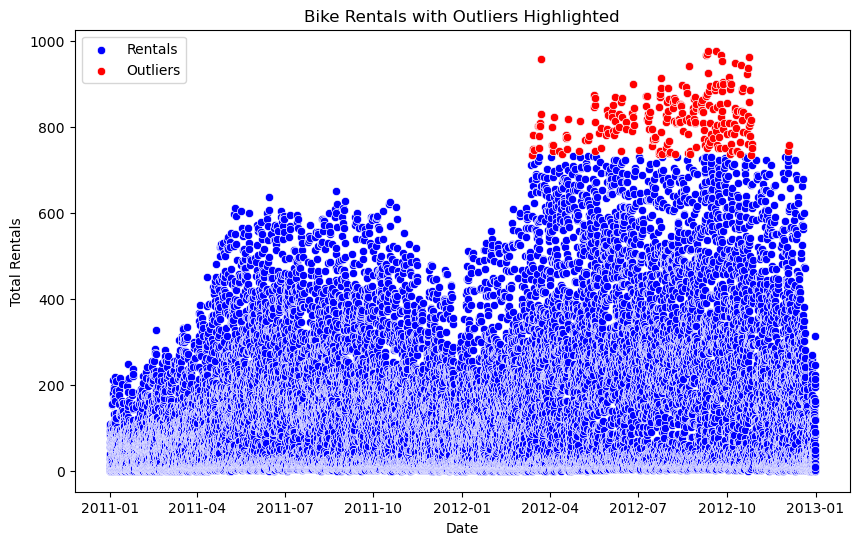

In [30]:
# Visualization of Z-Score Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike, x='rent_date', y='number_of_bike_rental', label='Rentals', color='blue')
sns.scatterplot(data=z_outliers, x='rent_date', y='number_of_bike_rental', label='Outliers', color='red')
plt.title('Bike Rentals with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()
